**regression:** Tujuan dari pembuatan model machine learning ini adalah untuk dapat memprediksi total quantity harian dari product yang terjual.

**clustering:** Tujuan dari pembuatan model machine learning ini adalah untuk dapat membuat cluster customer-customer yang mirip

1. membuat model prediktif menggunakan regresi dan
2. membuat clustering

*   Membaca data csv
*   Melakukan data cleansing
*   Menggabungkan semua data menjadi 1 data
*   Membuat model machine learning regression (time series)
*   Membuat model machine learning clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("drive/MyDrive/kalbe dataset")

# Load data and data cleansing

### product

In [4]:
product = pd.read_csv('Product.csv', sep=';')
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [6]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### customer

In [7]:
customer = pd.read_csv('Customer.csv', sep=';')
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [10]:
customer["Gender"] = customer['Gender'].astype('object')

In [11]:
customer['Income'] = customer['Income'].replace(',','.',regex=True)

In [12]:
customer["Income"] = customer['Income'].astype(float)

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    object 
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 17.6+ KB


<Axes: xlabel='Marital Status', ylabel='Count'>

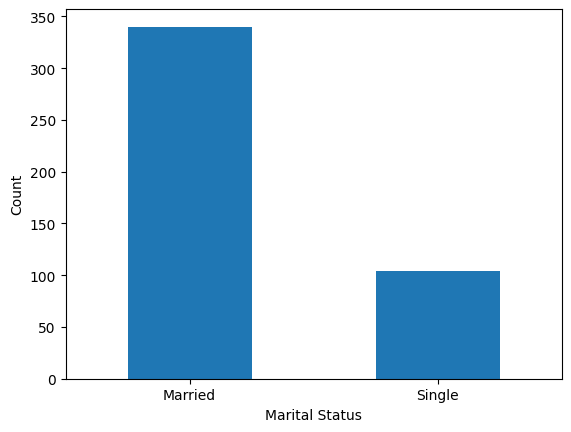

In [14]:
customer['Marital Status'].value_counts().plot(kind='bar', xlabel='Marital Status', ylabel='Count', rot=0)

In [15]:
# fill missing value with the most frequent value of that column
customer['Marital Status']=customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])

In [16]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### transaction

In [17]:
transaction = pd.read_csv('Transaction.csv', sep=';')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [18]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


question:
what datatype for date

In [19]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

### store

In [20]:
store = pd.read_csv('Store.csv', sep=';')
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [21]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


what is the data type for latitude longitude

In [22]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

# Merging all data

In [23]:
# merging product and transaction
df1 = pd.merge(product,transaction)
df1.head()

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4
1,P1,Choco Bar,8800,TR35256,160,01/01/2022,7,61600,4
2,P1,Choco Bar,8800,TR63499,118,02/01/2022,7,61600,14
3,P1,Choco Bar,8800,TR7826,181,02/01/2022,10,88000,12
4,P1,Choco Bar,8800,TR61437,123,05/01/2022,4,35200,6


In [24]:
# merging df1 + customer
df2 = pd.merge(df1,customer)
df2.head()

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4,27,1,Single,0.18
1,P2,Ginger Candy,3200,TR30598,183,01/05/2022,5,16000,13,27,1,Single,0.18
2,P2,Ginger Candy,3200,TR39885,183,26/10/2022,6,19200,1,27,1,Single,0.18
3,P3,Crackers,7500,TR80016,183,24/01/2022,2,15000,10,27,1,Single,0.18
4,P3,Crackers,7500,TR89318,183,17/07/2022,1,7500,12,27,1,Single,0.18


In [25]:
# merging df2 + store
df3 = pd.merge(df2,store)
df3

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4,27,1,Single,0.18,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
1,P1,Choco Bar,8800,TR35256,160,01/01/2022,7,61600,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
2,P2,Ginger Candy,3200,TR69288,160,24/01/2022,3,9600,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,P6,Cashew,18000,TR91768,160,28/08/2022,1,18000,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,P6,Cashew,18000,TR28489,160,27/11/2022,4,72000,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,P7,Coffee Candy,9400,TR43837,180,13/08/2022,6,56400,6,22,1,Married,4.07,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5016,P5,Thai Tea,4200,TR60092,182,14/10/2022,3,12600,6,44,1,Married,14.57,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5017,P10,Cheese Stick,15000,TR52555,411,28/04/2022,2,30000,6,19,1,Single,0.00,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5018,P8,Oat,16000,TR84455,265,10/09/2022,1,16000,6,62,1,Married,9.07,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"


In [26]:
df3.isnull().sum()

ProductID         0
Product Name      0
Price             0
TransactionID     0
CustomerID        0
Date              0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [27]:
df_merged = df3.copy()

# Feature Engineering
groupby by
date lalu yang di aggregasi adalah qty di sum

In [28]:
series = df_merged.groupby('Date').agg({'Qty':['sum']}).reset_index()
series.columns = ['Month','Sales']

In [29]:
series

,Month,Sales
0,01/01/2022,49
1,01/02/2022,50
2,01/03/2022,76
3,01/04/2022,98
4,01/05/2022,67
...,...,...
360,31/05/2022,21
361,31/07/2022,72
362,31/08/2022,36
363,31/10/2022,69


In [30]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   365 non-null    object
 1   Sales   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [31]:
# convert into Datetime
series['Month']=pd.to_datetime(series['Month'])

<ipython-input-31-4be711f5846e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  series['Month']=pd.to_datetime(series['Month'])


In [32]:
series

,Month,Sales
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-05-31,21
361,2022-07-31,72
362,2022-08-31,36
363,2022-10-31,69


In [33]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   365 non-null    datetime64[ns]
 1   Sales   365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


# Modelling

In [34]:
!pip install pmdarima

In [35]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [36]:
series.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

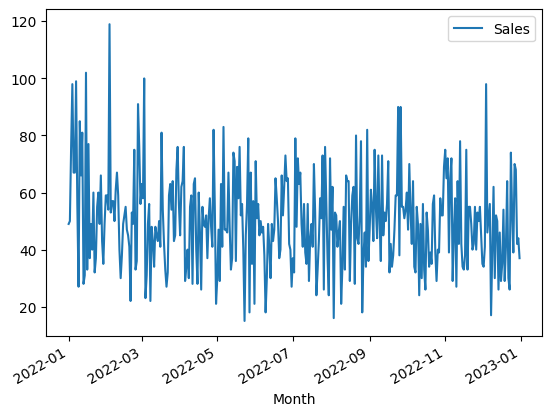

In [37]:
series.plot()

In [38]:
row_292 = series.iloc[291]
print(row_292)

Sales    58
Name: 2022-04-25 00:00:00, dtype: int64


## Split dataset

In [39]:
train_start_dt = '2022-01-01'
test_start_dt = '2022-11-20'

train = series.loc[train_start_dt:test_start_dt].copy()
test = series.loc[test_start_dt:].copy()

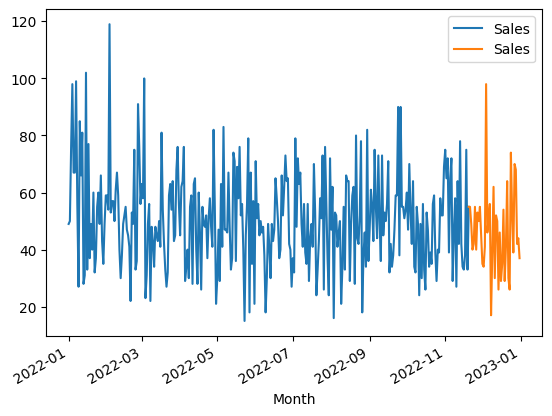

In [40]:
import matplotlib.pyplot as plt

# plot untuk mengilustrasikan perbedaan train/test set
fig, ax = pyplot.subplots()
train.plot(ax=ax, label='training data');
test.plot(ax=ax, label='testing data');

ax.legend()
plt.show()

In [41]:
train.tail()

,Sales
Month,
2022-03-31,56
2022-05-31,21
2022-07-31,72
2022-08-31,36
2022-10-31,69


In [42]:
test.tail()

,Sales
Month,
2022-11-29,55
2022-12-29,42
2022-11-30,45
2022-12-30,44
2022-12-31,37


## Create model

In [43]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=2,
                            start_q=0,
                            test="adf",
                            seasonal=True,
                            trace=True,
                            stepwise=False)
  return automodel

In [44]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2752.773, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2754.773, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2756.689, Time=0.41 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2754.093, Time=0.30 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2755.914, Time=0.38 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2757.629, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2754.773, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2756.767, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2754.510, Time=0.76 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2755.966, Time=0.54 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2757.961, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2756.684, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2758.483, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2753.659, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2755.850, Time=1.85 sec
 ARIMA(3,0

## Forecast

In [45]:
test.shape

(42, 1)

In [46]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


324    50.598765
325    50.598765
326    50.598765
327    50.598765
328    50.598765
329    50.598765
330    50.598765
331    50.598765
332    50.598765
333    50.598765
334    50.598765
335    50.598765
336    50.598765
337    50.598765
338    50.598765
339    50.598765
340    50.598765
341    50.598765
342    50.598765
343    50.598765
344    50.598765
345    50.598765
346    50.598765
347    50.598765
348    50.598765
349    50.598765
350    50.598765
351    50.598765
352    50.598765
353    50.598765
354    50.598765
355    50.598765
356    50.598765
357    50.598765
358    50.598765
359    50.598765
360    50.598765
361    50.598765
362    50.598765
363    50.598765
364    50.598765
365    50.598765
dtype: float64

## Visualisasi

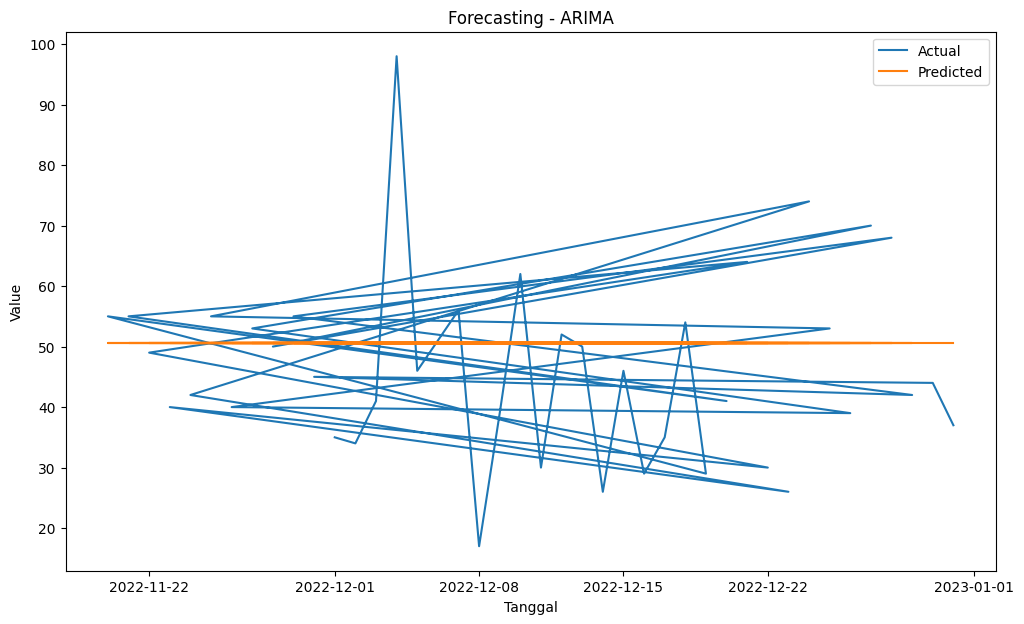

In [47]:
# plot untuk mengilustrasikan perbedaan actual dan predicted price
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend();

## Evaluate

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.376


# Improvement - More training data

## Split dataset

In [50]:
train_start_dt = '2022-01-01'
test_start_dt = '2022-12-20'

train = series.loc[train_start_dt:test_start_dt].copy()
test = series.loc[test_start_dt:].copy()

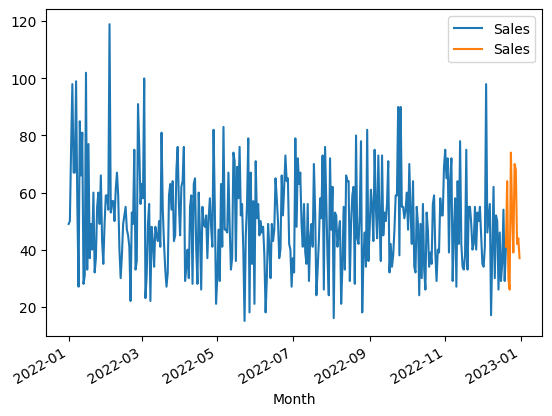

In [51]:
# plot untuk mengilustrasikan perbedaan train/test set
fig, ax = pyplot.subplots()
train.plot(ax=ax, label='training data');
test.plot(ax=ax, label='testing data');

ax.legend()
plt.show()

## Create model

In [52]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=3001.814, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=3003.807, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=3005.789, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=3002.233, Time=0.65 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=3003.348, Time=0.92 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=3005.332, Time=1.28 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=3003.807, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=3005.813, Time=0.84 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=3003.159, Time=3.32 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=3003.626, Time=1.15 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=3005.429, Time=1.01 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=3005.793, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=3007.661, Time=0.79 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=3004.758, Time=2.02 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=3005.110, Time=1.67 sec
 ARIMA(3,0

## Predictions

In [53]:
test.shape

(12, 1)

In [54]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


354    50.138418
355    50.138418
356    50.138418
357    50.138418
358    50.138418
359    50.138418
360    50.138418
361    50.138418
362    50.138418
363    50.138418
364    50.138418
365    50.138418
dtype: float64

## Visualisasi

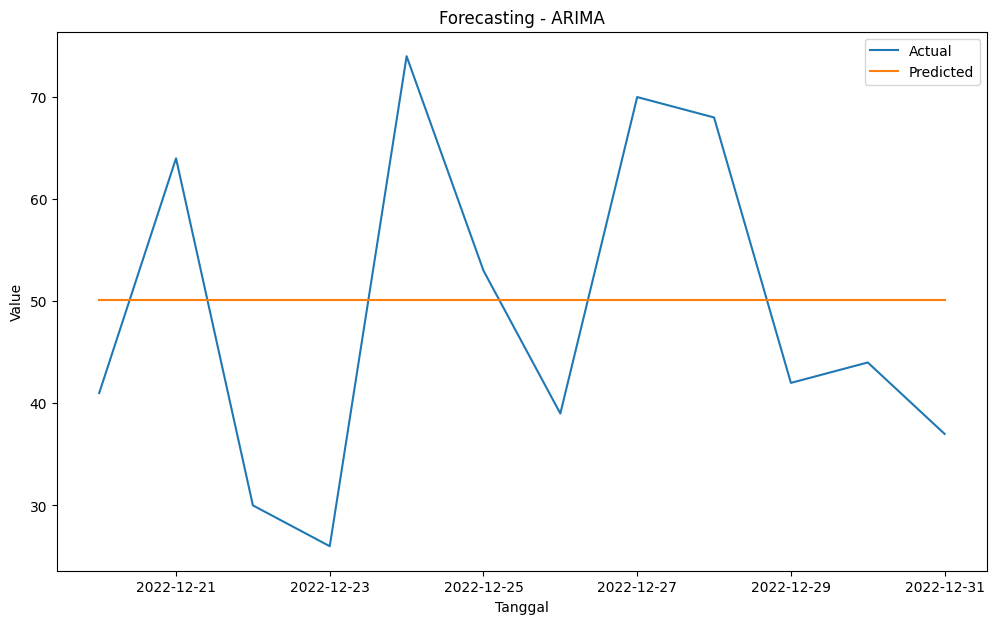

In [55]:
# plot untuk mengilustrasikan perbedaan actual dan predicted price
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend();

In [56]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.694


# Improvement - More training data II

## Split dataset

In [57]:
train_start_dt = '2022-01-01'
test_start_dt = '2022-12-30'

train = series.loc[train_start_dt:test_start_dt].copy()
test = series.loc[test_start_dt:].copy()

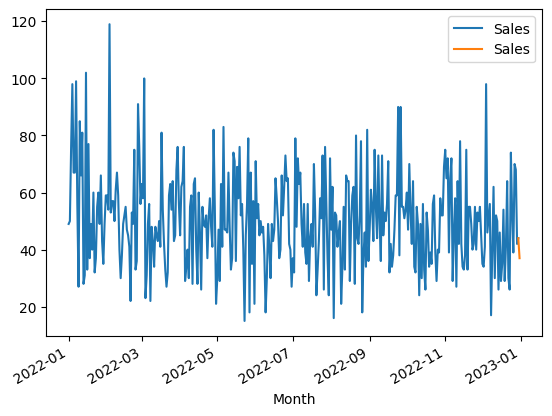

In [58]:
# plot untuk mengilustrasikan perbedaan train/test set
fig, ax = pyplot.subplots()
train.plot(ax=ax, label='training data');
test.plot(ax=ax, label='testing data');

ax.legend()
plt.show()

## Create model

In [59]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=3086.180, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=3088.178, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=3090.120, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=3086.441, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=3086.119, Time=0.76 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=3087.672, Time=1.11 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=3088.178, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=3090.178, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=3092.128, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=3085.525, Time=2.82 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=3087.882, Time=0.91 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=3090.109, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=3092.178, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=3089.458, Time=1.85 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=3087.808, Time=2.05 sec
 ARIMA(3,0

## Predictions

In [60]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


364    50.849241
365    48.543024
dtype: float64

## Visualisasi

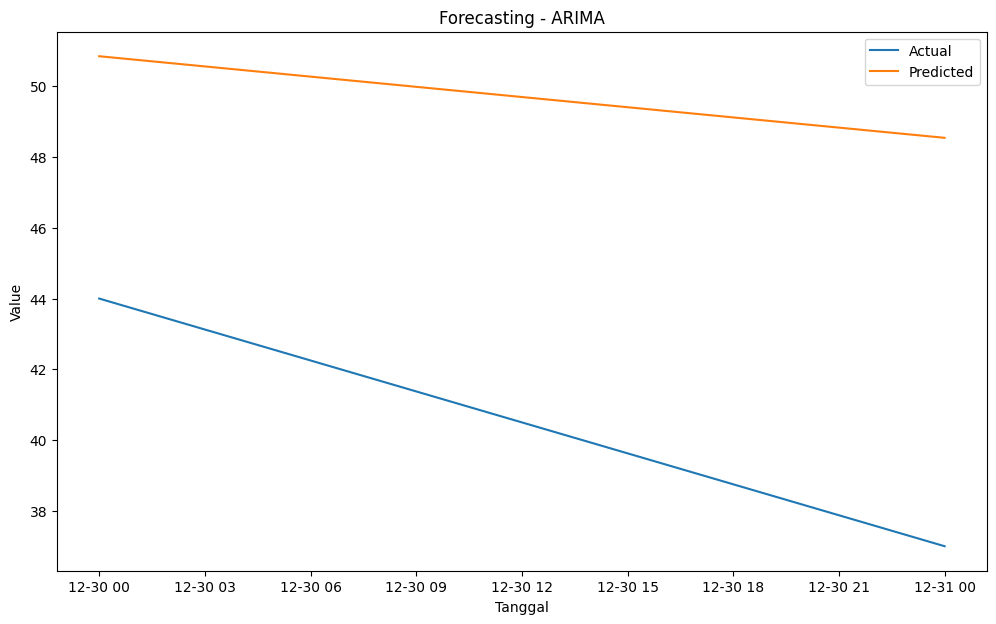

In [61]:
# plot untuk mengilustrasikan perbedaan actual dan predicted price
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend();

In [62]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.491
